In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\gelez\Downloads\21-housing (1).csv")

In [4]:
df.head()

longitude  latitude  housing_median_age  total_rooms  ...  households  median_income  median_house_value  ocean_proximity
0    -122.23     37.88                41.0        880.0  ...       126.0         8.3252            452600.0         NEAR BAY
1    -122.22     37.86                21.0       7099.0  ...      1138.0         8.3014            358500.0         NEAR BAY
2    -122.24     37.85                52.0       1467.0  ...       177.0         7.2574            352100.0         NEAR BAY
3    -122.25     37.85                52.0       1274.0  ...       219.0         5.6431            341300.0         NEAR BAY
4    -122.25     37.85                52.0       1627.0  ...       259.0         3.8462            342200.0         NEAR BAY

[5 rows x 10 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

longitude      latitude  housing_median_age  ...    households  median_income  median_house_value
count  20640.000000  20640.000000        20640.000000  ...  20640.000000   20640.000000        20640.000000
mean    -119.569704     35.631861           28.639486  ...    499.539680       3.870671       206855.816909
std        2.003532      2.135952           12.585558  ...    382.329753       1.899822       115395.615874
min     -124.350000     32.540000            1.000000  ...      1.000000       0.499900        14999.000000
25%     -121.800000     33.930000           18.000000  ...    280.000000       2.563400       119600.000000
50%     -118.490000     34.260000           29.000000  ...    409.000000       3.534800       179700.000000
75%     -118.010000     37.710000           37.000000  ...    605.000000       4.743250       264725.000000
max     -114.310000     41.950000           52.000000  ...   6082.000000      15.000100       500001.000000

[8 rows x 9 columns]

In [7]:
df.shape

(20640, 10)

In [8]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

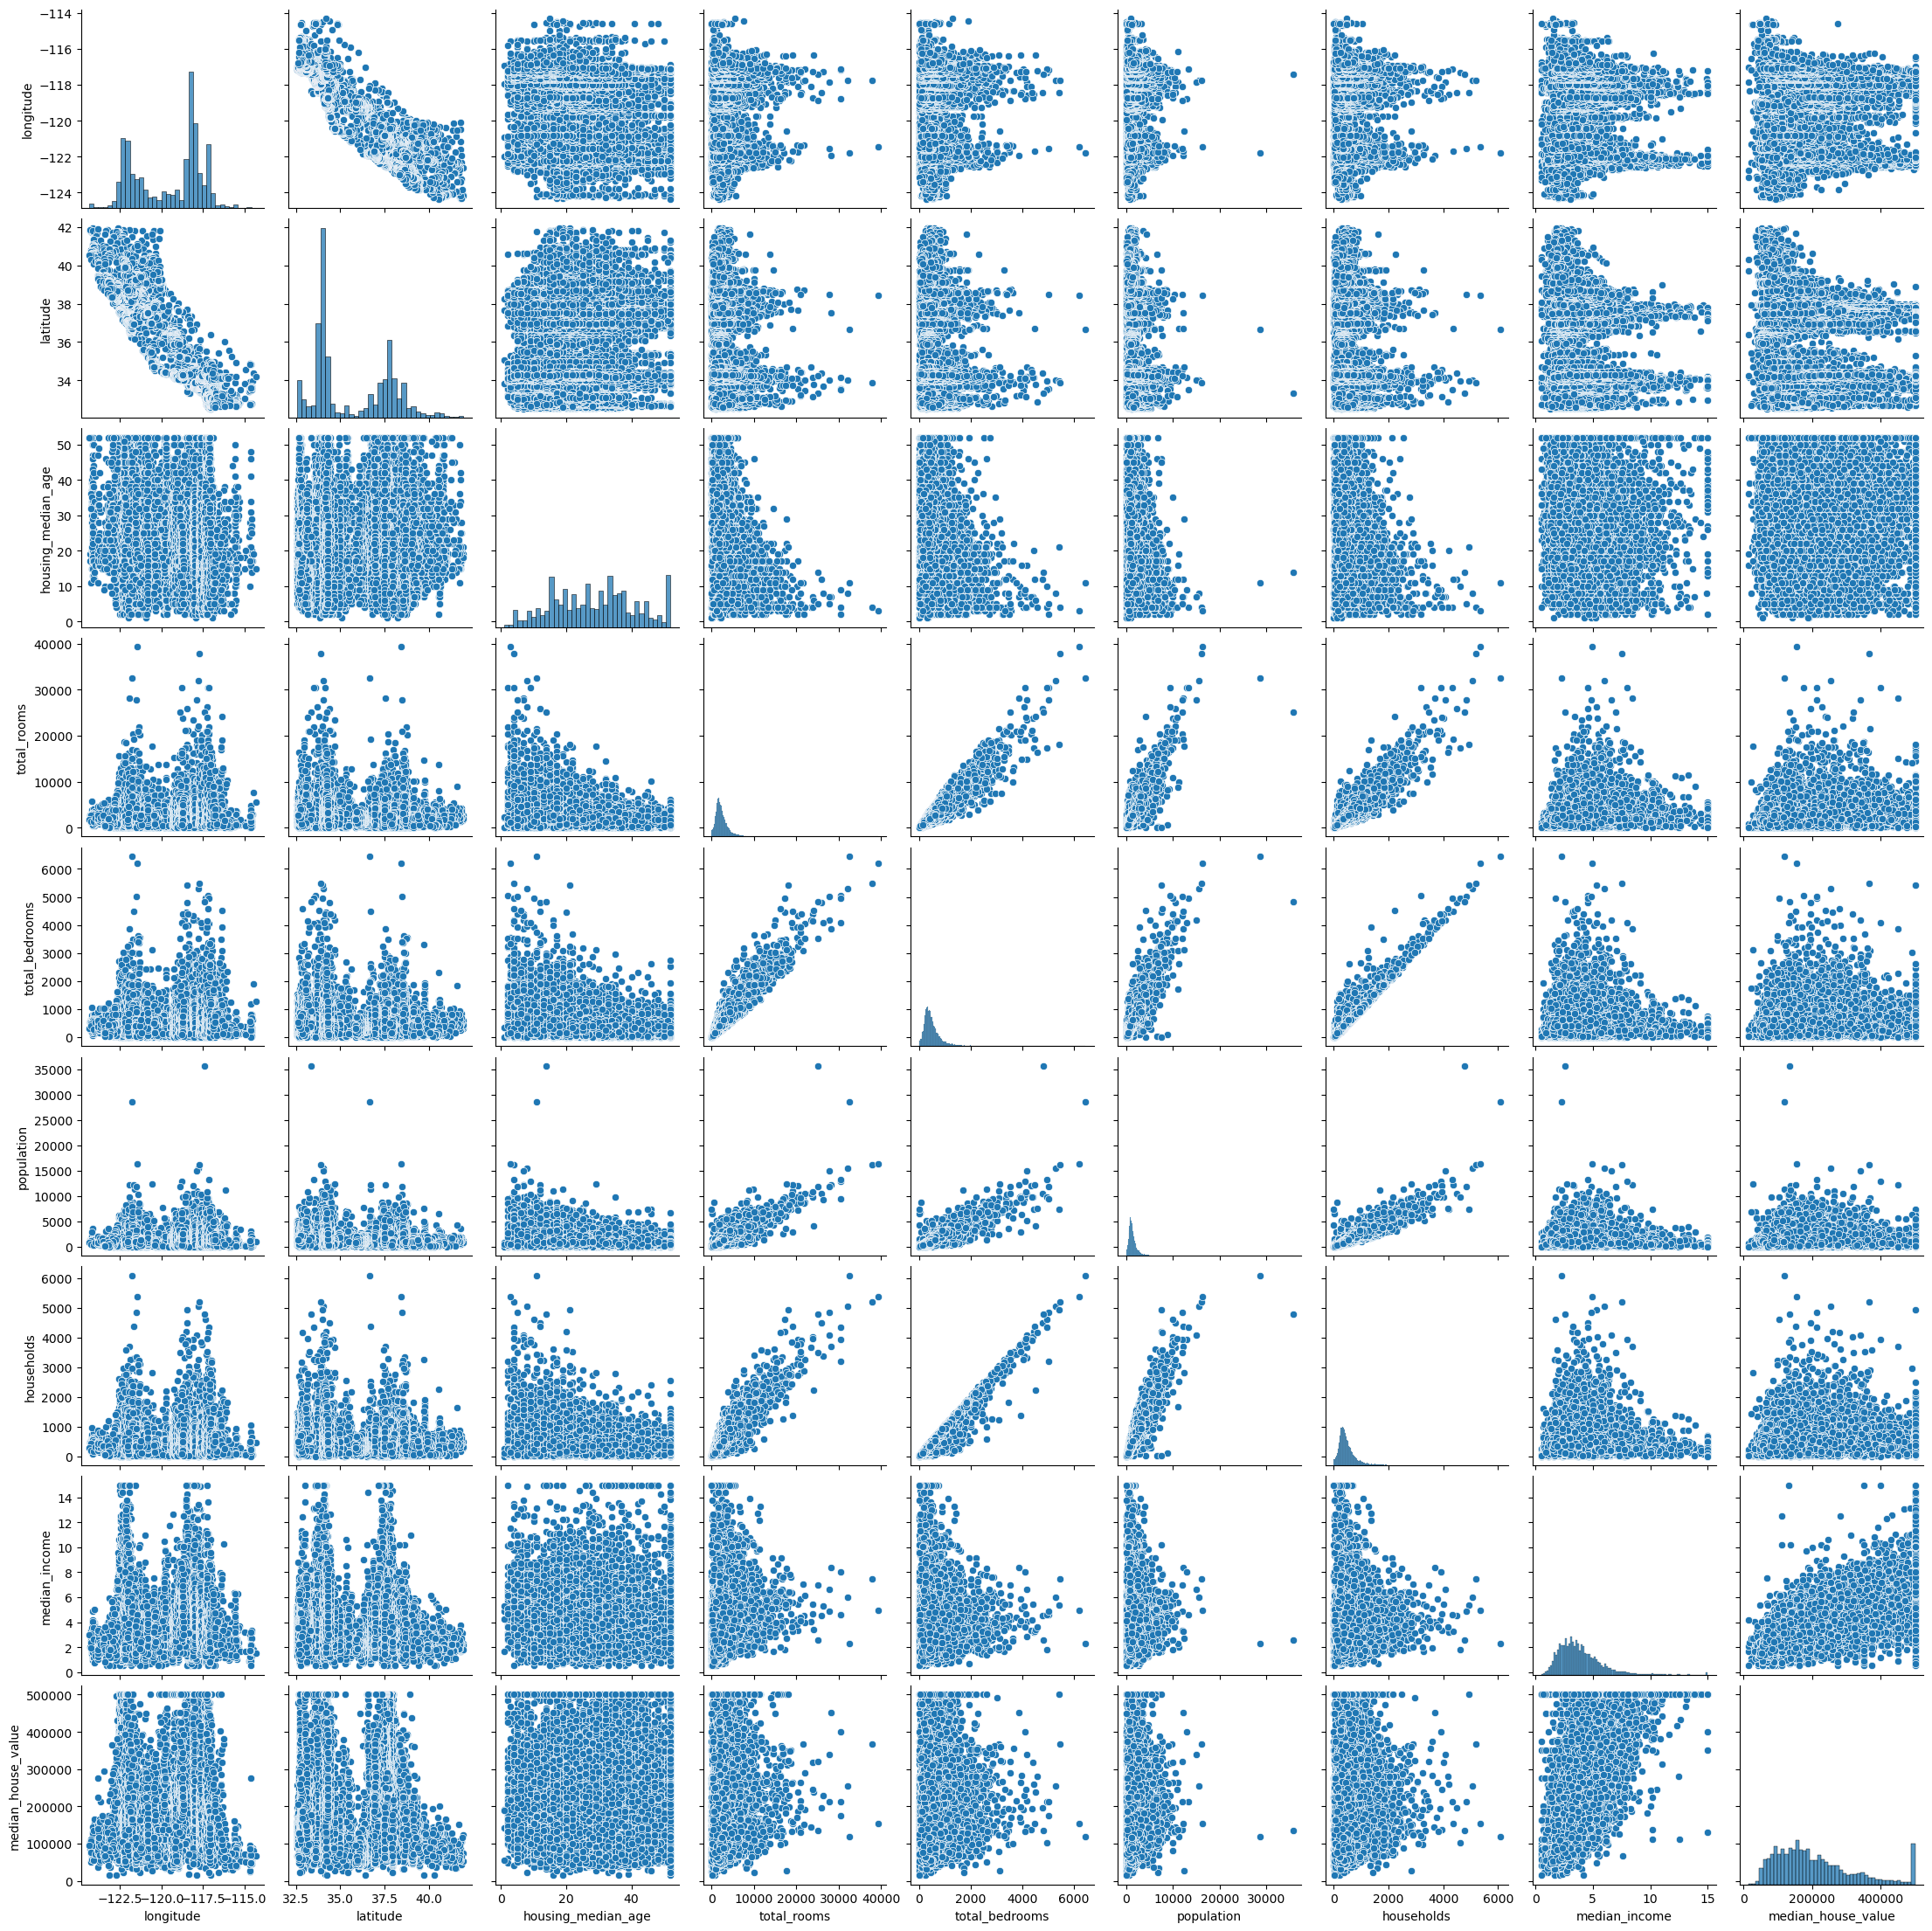

In [9]:
sns.pairplot(df)
plt.show()

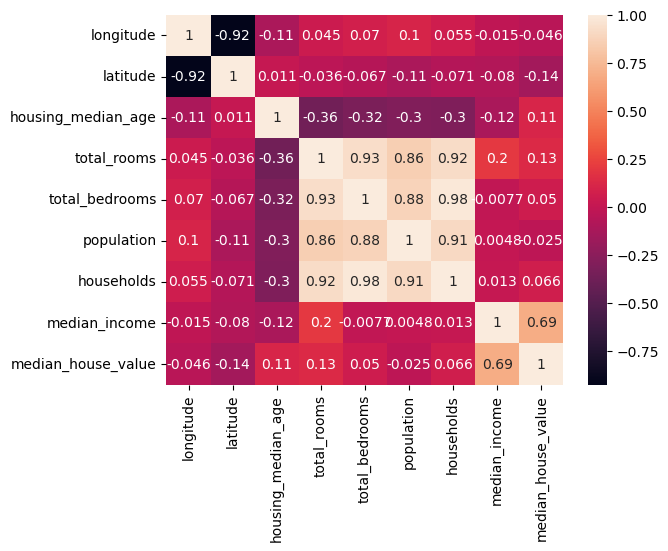

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

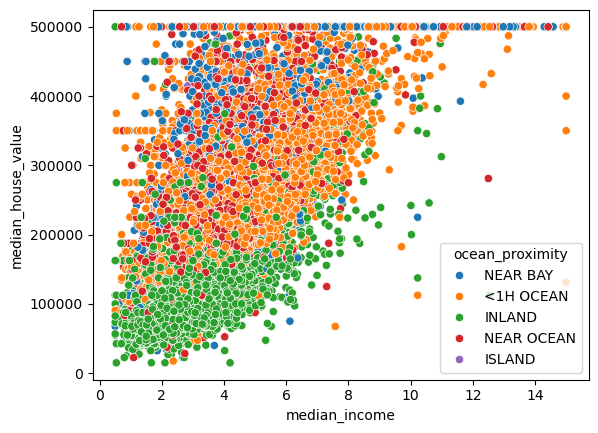

In [11]:
sns.scatterplot(data = df, x = "median_income", y = "median_house_value", hue = "ocean_proximity")
plt.show()

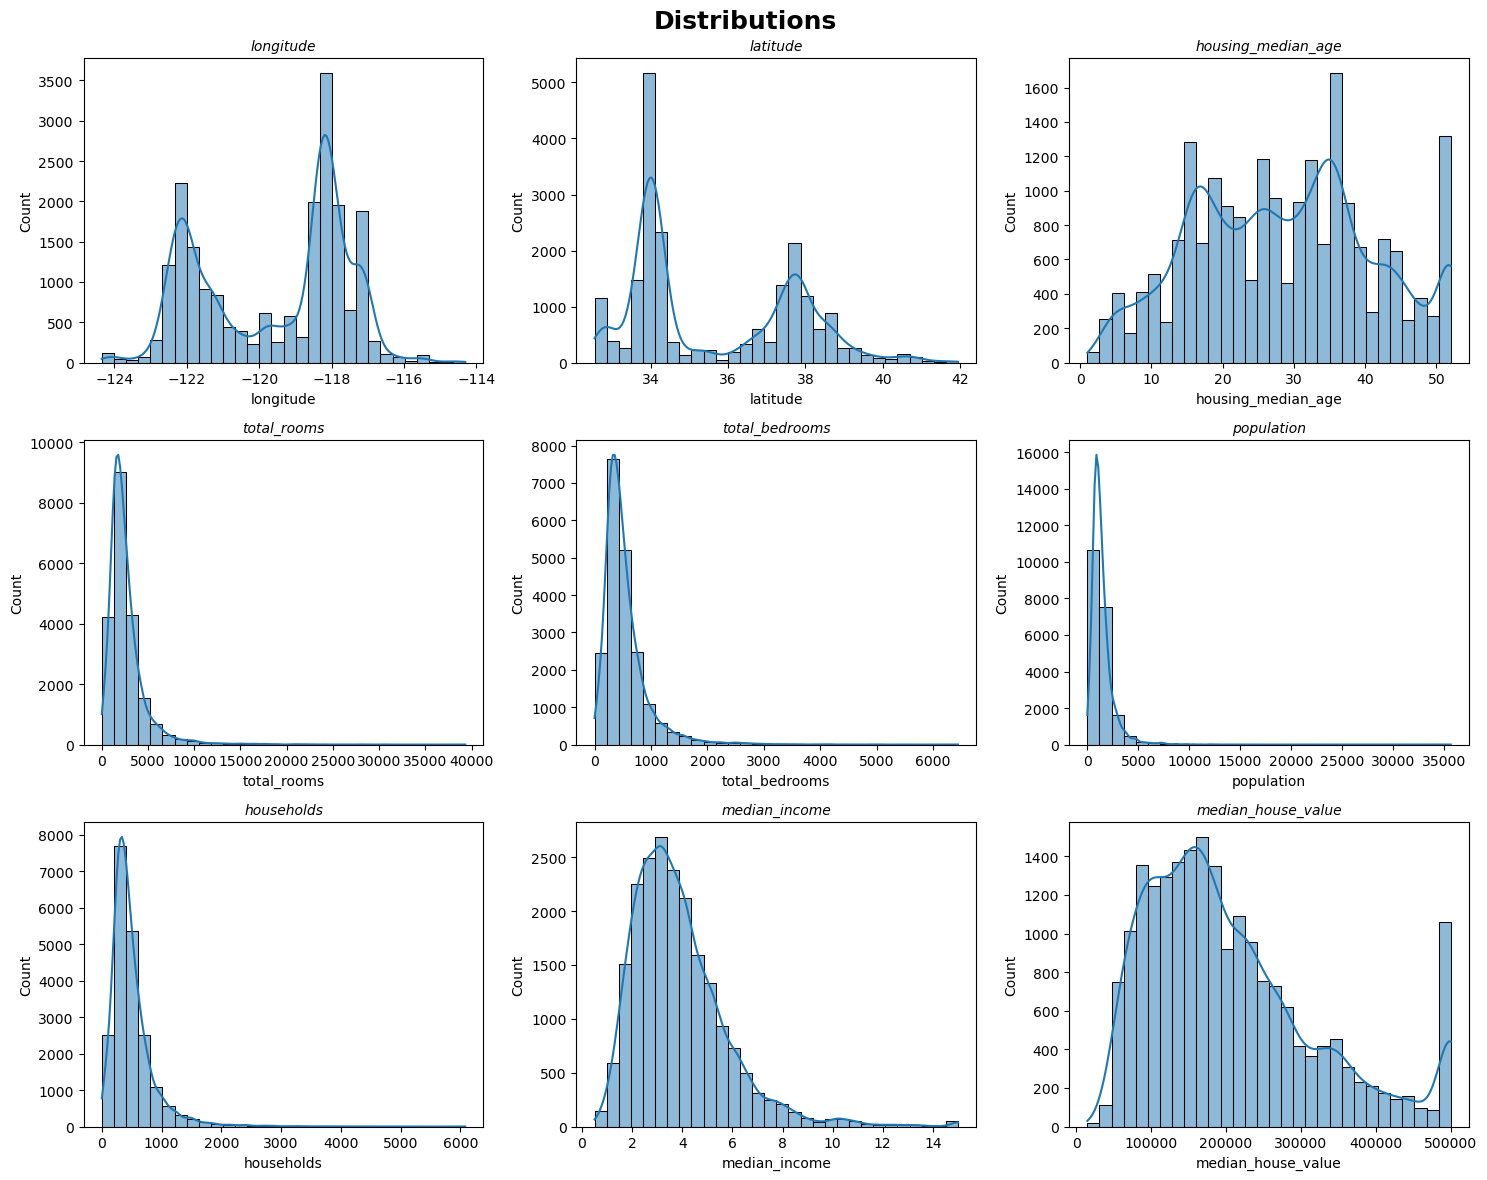

In [12]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(15,12))
fig.suptitle("Distributions", fontsize = 18, fontweight = "bold")

for i, col in enumerate(columns):
    row = i // 3
    col_idx = i % 3
    ax = axes[row, col_idx]
    sns.histplot(data = df, x = col, kde=True, ax=ax, bins=30)
    ax.set_title(col, fontsize=10, fontstyle = "italic")

plt.tight_layout()
plt.show()

In [13]:
df.head()

longitude  latitude  housing_median_age  total_rooms  ...  households  median_income  median_house_value  ocean_proximity
0    -122.23     37.88                41.0        880.0  ...       126.0         8.3252            452600.0         NEAR BAY
1    -122.22     37.86                21.0       7099.0  ...      1138.0         8.3014            358500.0         NEAR BAY
2    -122.24     37.85                52.0       1467.0  ...       177.0         7.2574            352100.0         NEAR BAY
3    -122.25     37.85                52.0       1274.0  ...       219.0         5.6431            341300.0         NEAR BAY
4    -122.25     37.85                52.0       1627.0  ...       259.0         3.8462            342200.0         NEAR BAY

[5 rows x 10 columns]

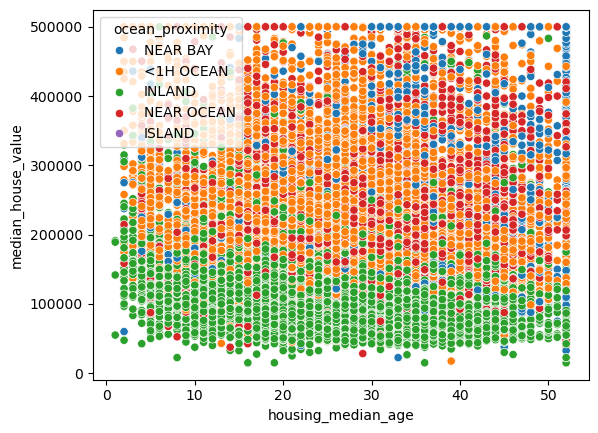

In [14]:
sns.scatterplot(data = df, x = "housing_median_age", y = "median_house_value", hue = "ocean_proximity")
plt.show()

In [15]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

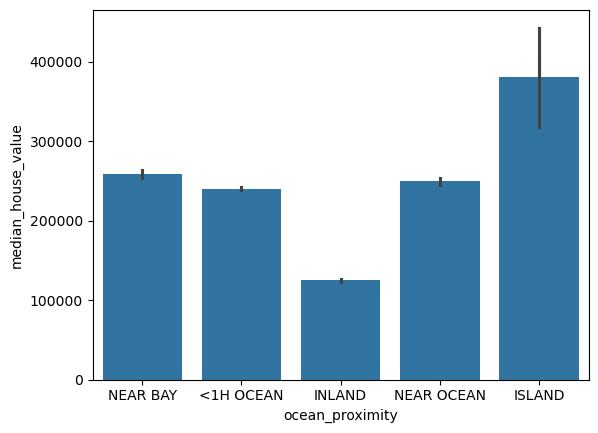

In [16]:
sns.barplot(data = df, x = "ocean_proximity", y = "median_house_value")
plt.show()

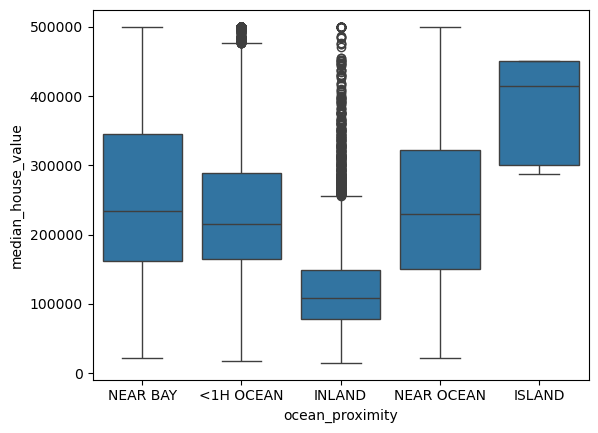

In [17]:
sns.boxplot(data = df, x = "ocean_proximity", y = "median_house_value")
plt.show()

In [18]:
# outlier değerleri bulmak için 

In [19]:
def find_outliers_iqr(df, threshold = 1.5):
    outlier_summary = {}

    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = df[ (df[col] < lower_bound) | (df[col] > upper_bound)]
        
        outlier_summary[col] = {
            "outlier_count" : outliers.shape[0],
            "outlier_percentage" : 100 * outliers.shape[0] / df.shape[0],
            "lower_bound" : lower_bound,
            "upper_bound" : upper_bound
        }
    return pd.DataFrame(outlier_summary)

In [20]:
find_outliers_iqr(df, threshold = 1.5)

longitude  latitude  housing_median_age  ...   households  median_income  median_house_value
outlier_count           0.000      0.00                 0.0  ...  1220.000000     681.000000         1071.000000
outlier_percentage      0.000      0.00                 0.0  ...     5.910853       3.299419            5.188953
lower_bound          -127.485     28.26               -10.5  ...  -207.500000      -0.706375       -98087.500000
upper_bound          -112.325     43.38                65.5  ...  1092.500000       8.013025       482412.500000

[4 rows x 9 columns]

In [21]:
# i will only remove outliers in our target column which is median_house_value
# model tries to predict this value and outliers in target column may corrupt loss function and result in deviations
# of course outliers in input columns may corrupt the model as well but if we are using a decision tree based model
# such as gradients, forests etc it wouldn't hurt us much
# and we will preserve the most of the data 
# let's create two functions to compare how would it look like if we clean all data and only output column

In [22]:
# sectigimiz kolondaki outlierlari siler
def remove_outliers_from_column(df,target_col, threshold = 1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[ (df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [23]:
# tüm outlier degerleri siler
def remove_outliers_from_all_columns(df, threshold = 1.5):
    df_clean = df.copy()
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean.copy()

In [24]:
print("original data shape: ", df.shape)
df_target_clean = remove_outliers_from_column(df, "median_house_value")
print("only target column cleaning shape: ", df_target_clean.shape)
df_all_clean = remove_outliers_from_all_columns(df)
print("all columns cleaning shape: ", df_all_clean.shape)

original data shape:  (20640, 10)
only target column cleaning shape:  (19569, 10)
all columns cleaning shape:  (17446, 10)


In [25]:
df_target_clean.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [26]:
df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())

C:\Users\gelez\AppData\Local\Temp\ipykernel_16820\3688706348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())


In [27]:
df_target_clean.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [28]:
df_target_clean = pd.get_dummies(df_target_clean, columns=["ocean_proximity"], drop_first=True)

In [29]:
df_target_clean.head()

longitude  latitude  ...  ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN
0    -122.23     37.88  ...                      True                       False
1    -122.22     37.86  ...                      True                       False
2    -122.24     37.85  ...                      True                       False
3    -122.25     37.85  ...                      True                       False
4    -122.25     37.85  ...                      True                       False

[5 rows x 13 columns]

In [30]:
X = df_target_clean.drop("median_house_value", axis = 1)
y = df_target_clean["median_house_value"]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [32]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [33]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [34]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor(),
    "Gradient Boost Regressor" : GradientBoostingRegressor(),
    "XGBoost Regressor" : XGBRegressor()
}

In [35]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model performance for Training Set")
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("R2 Score: ", model_train_r2)

    print("-----------------------------------")
    
    print("Model performance for Test Set")
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("R2 Score: ", model_test_r2)

    print("-----------------------------------")
    print("\n")

Linear Regression
Model performance for Training Set
Root Mean Squared Error:  59377.10592926238
Mean Absolute Error:  43858.38748241079
R2 Score:  0.6104236470924751
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  58769.5472573924
Mean Absolute Error:  43594.36386300793
R2 Score:  0.626329615722949
-----------------------------------


Lasso
Model performance for Training Set
Root Mean Squared Error:  59377.14466856272
Mean Absolute Error:  43859.00858534633
R2 Score:  0.6104231387510857
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  58768.46230442246
Mean Absolute Error:  43594.66878006596
R2 Score:  0.6263434123598097
-----------------------------------


Ridge
Model performance for Training Set
Root Mean Squared Error:  59381.168680071445
Mean Absolute Error:  43864.677314937166
R2 Score:  0.6103703334199279
-----------------------------------
Model performance for Test Set
Root Mean Squared 

In [36]:
xgboost_params = {
        "learning_rate" : [0.1, 0.01],
        "max_depth" : [5,8,12,20,30],
        "n_estimators" : [100,200,300,500],
        "colsample_bytree" : [0.3, 0.4, 0.5, 0.7, 1]
}

In [37]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=xgboost_params, cv= 5, n_jobs=-1)
rscv.fit(X_train, y_train)
rscv.best_params_

{'n_estimators': 200,
 'max_depth': 5,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7}

In [38]:
model = XGBRegressor(n_estimators = 300, max_depth = 6, learning_rate = 0.1, colsample_bytree = 0.7)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [39]:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model performance for Training Set")
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("R2 Score: ", model_train_r2)

    print("-----------------------------------")
    
    print("Model performance for Test Set")
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("R2 Score: ", model_test_r2)

    print("-----------------------------------")
    print("\n")

XGBoost Regressor
Model performance for Training Set
Root Mean Squared Error:  24417.60380421839
Mean Absolute Error:  17390.126739247975
R2 Score:  0.9341189335336114
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  41355.78357689603
Mean Absolute Error:  28162.712415900187
R2 Score:  0.8149638871706426
-----------------------------------




In [40]:
param_grid = {
    "loss" : ['squared_error', 'absolute_error'],
    "learning_rate" : [0.001, 0.01, 0.1, 1],
    "n_estimators" : [100, 200, 300, 500],
    "max_features" : ['sqrt', 'log2']
}

In [41]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = param_grid, cv=5, n_jobs=-1 )
grid.fit(X_train, y_train)
grid.best_params_

{'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_features': 'log2',
 'n_estimators': 500}

In [42]:
model = GradientBoostingRegressor(learning_rate=0.1, loss="squared_error", max_features="log2", n_estimators=500)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_features='log2', n_estimators=500)

In [43]:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model performance for Training Set")
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("R2 Score: ", model_train_r2)

    print("-----------------------------------")
    
    print("Model performance for Test Set")
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("R2 Score: ", model_test_r2)

    print("-----------------------------------")
    print("\n")

XGBoost Regressor
Model performance for Training Set
Root Mean Squared Error:  39800.08480314033
Mean Absolute Error:  28158.318579072213
R2 Score:  0.8249659546029522
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  45012.865563143394
Mean Absolute Error:  31361.551726402853
R2 Score:  0.7807915398160074
-----------------------------------




 Transformation

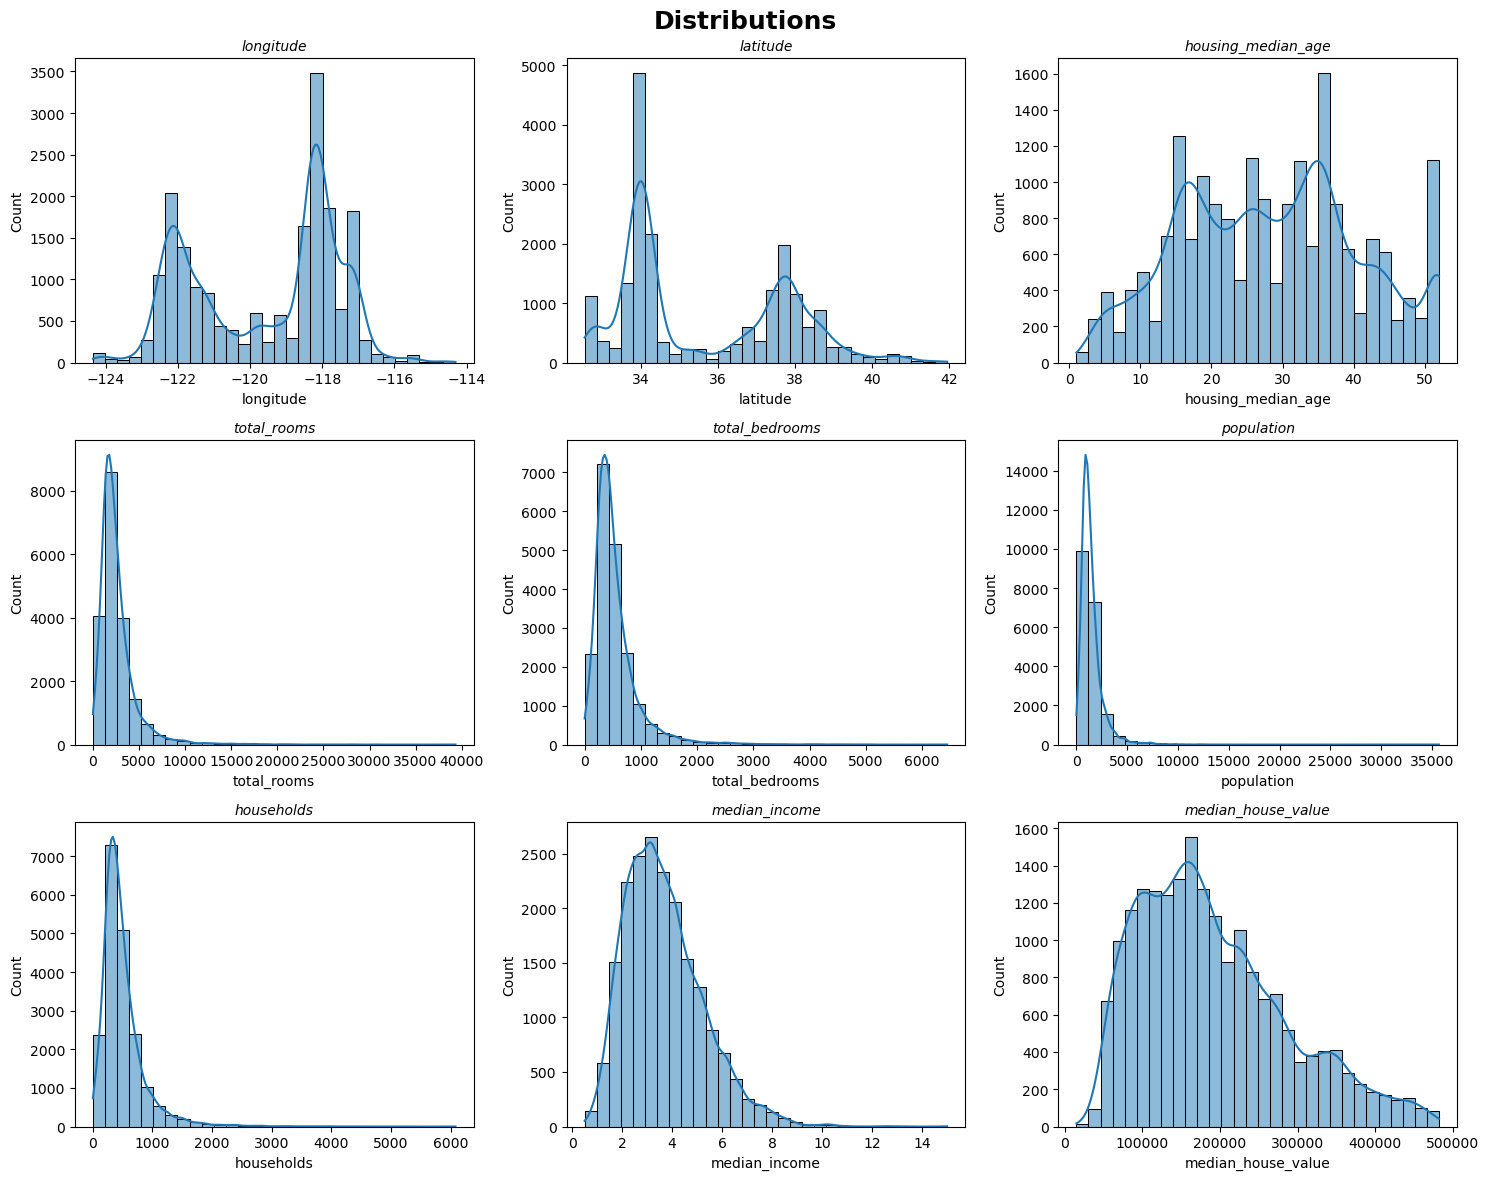

In [56]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(15,12))
fig.suptitle("Distributions", fontsize = 18, fontweight = "bold")

for i, col in enumerate(columns):
    row = i // 3
    col_idx = i % 3
    ax = axes[row, col_idx]
    sns.histplot(data = df_target_clean, x = col, kde=True, ax=ax, bins=30)
    ax.set_title(col, fontsize=10, fontstyle = "italic")

plt.tight_layout()
plt.show()

In [57]:
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer

In [58]:
skewed_cols = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [59]:
df_target_clean[skewed_cols].apply(skew).sort_values(ascending=False)

population        4.961787
total_rooms       4.228578
total_bedrooms    3.479223
households        3.406650
median_income     0.889306
dtype: float64

In [60]:
pt = PowerTransformer(method="yeo-johnson")

In [61]:
X_train[skewed_cols] = pt.fit_transform(X_train[skewed_cols])
X_test[skewed_cols] = pt.transform(X_test[skewed_cols])

In [66]:
X_train[skewed_cols].apply(skew).sort_values(ascending=False)

total_rooms       0.122063
population        0.114484
households        0.109079
total_bedrooms    0.105735
median_income    -0.000945
dtype: float64

In [69]:
X_train.head()

longitude  latitude  ...  ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN
6487     -118.00     34.10  ...                     False                       False
15385    -116.95     33.31  ...                     False                       False
12111    -117.34     34.02  ...                     False                       False
10811    -117.92     33.64  ...                     False                       False
3290     -122.66     39.03  ...                     False                       False

[5 rows x 12 columns]

In [71]:
import math
def  plot_all_histograms(df, title_prefix = ""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols)/3)
    plt.figure(figsize=(5*n_cols, 4*n_rows))
    for i,col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde  =True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")
    plt.tight_layout()
    plt.show()

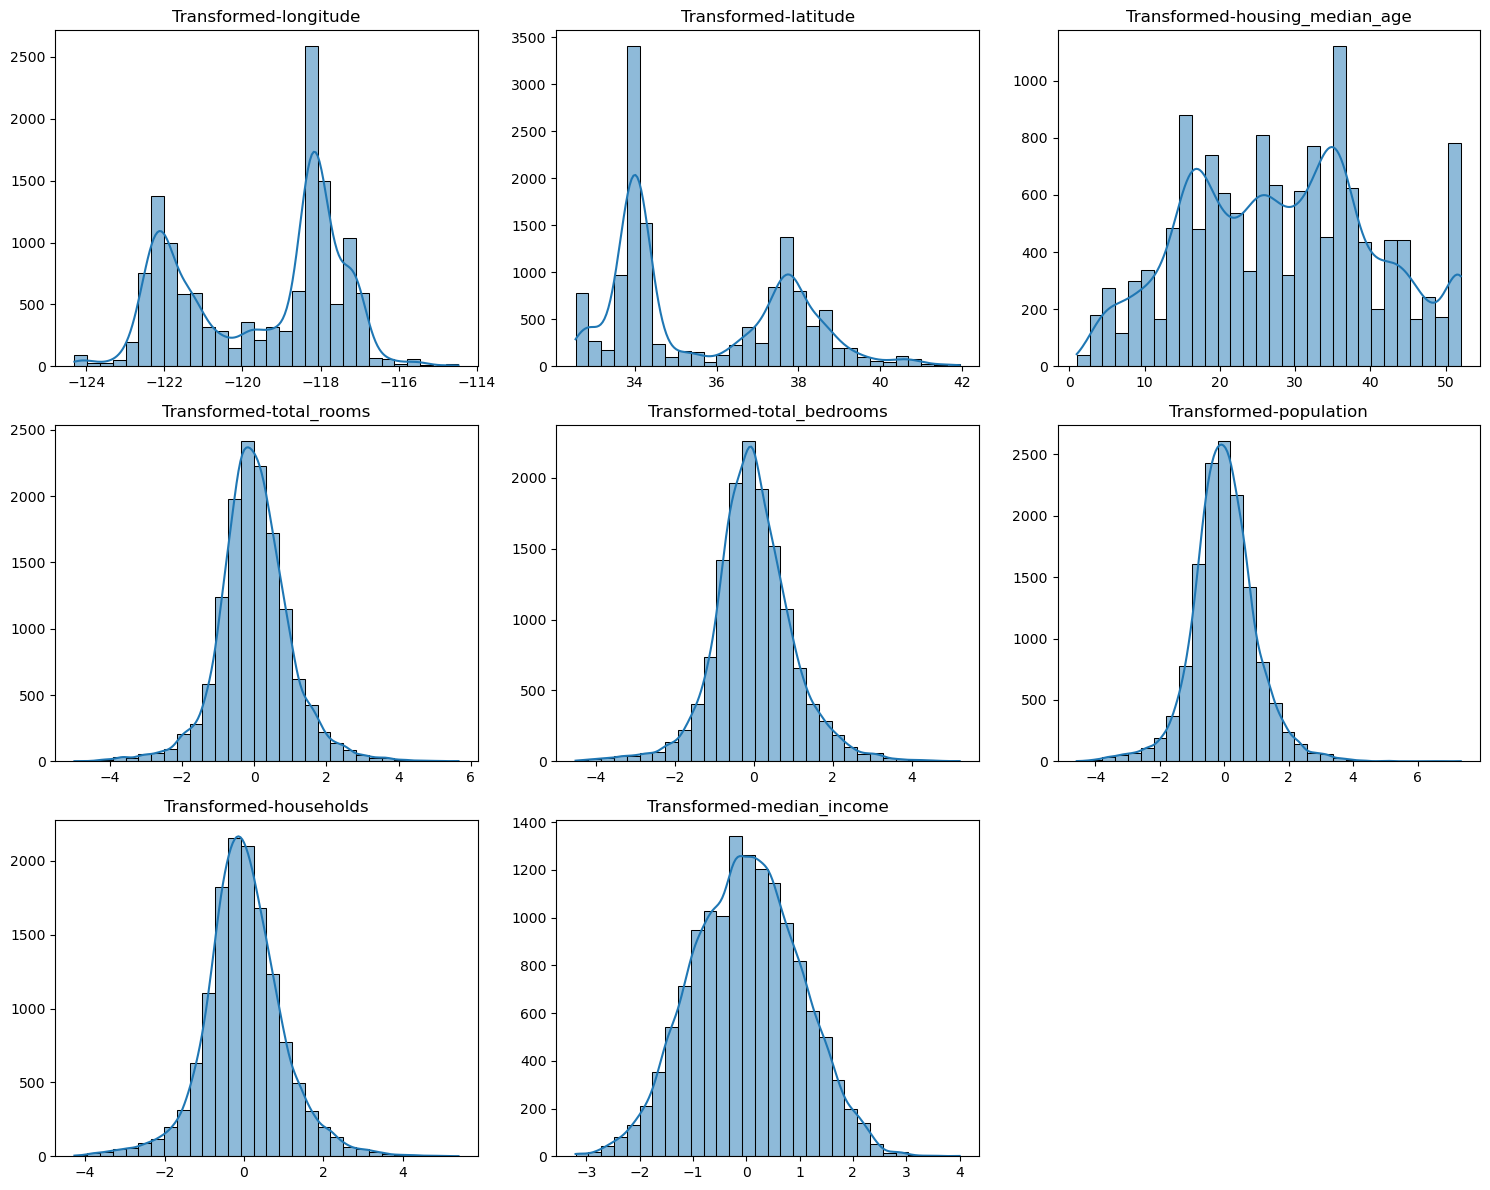

In [72]:
plot_all_histograms(X_train, title_prefix= "Transformed-")

In [73]:
from lightgbm import LGBMRegressor

In [74]:
lgbm = LGBMRegressor()

In [75]:
lgbm.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Sistem belirtilen dosyayı bulamıyor
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1844
[LightGBM] [Info] Number of data points in the train set: 13698, number of used features: 11
[LightGBM] [Info] Start training from score 190578.120602


LGBMRegressor()

In [76]:
y_pred = lgbm.predict(X_test)

In [77]:
print("r2 score: ", r2_score(y_pred, y_test))
print("mean absolute error: ", mean_absolute_error(y_pred, y_test))
print("mean squared error: ", mean_squared_error(y_pred, y_test))

r2 score:  0.7469839506743658
mean absolute error:  29182.83610615716
mean squared error:  1790027829.5600345


In [78]:
param_grid = {
    "num_leaves" : [31, 50, 70],
    "max_depth" : [-1, 5, 10],
    "learning_rate" : [0.01, 0.05, 0.1],
    "n_estimators" : [100, 300, 1000],
    "min_child_samples" : [10,20,30],
    "subsample" : [0.6, 0.8, 1.0],
    "colsample_bytree" : [0.6, 0.8, 1.0],
    "reg_alpha" : [0, 0.5, 1.0],
    "reg_lambda" : [0, 0.5, 1.0]
}

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
import warnings
warnings.filterwarnings("ignore")

In [81]:
random_search = RandomizedSearchCV(
    estimator=LGBMRegressor(verbosity = -1),
    param_distributions = param_grid,
    cv = 5,
    verbose=0,
    random_state=15,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

In [82]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(verbosity=-1), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [-1, 5, 10],
                                        'min_child_samples': [10, 20, 30],
                                        'n_estimators': [100, 300, 1000],
                                        'num_leaves': [31, 50, 70],
                                        'reg_alpha': [0, 0.5, 1.0],
                                        'reg_lambda': [0, 0.5, 1.0],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=15, scoring='neg_root_mean_squared_error')

In [84]:
random_search.best_params_

{'subsample': 0.8,
 'reg_lambda': 0,
 'reg_alpha': 1.0,
 'num_leaves': 70,
 'n_estimators': 300,
 'min_child_samples': 20,
 'max_depth': 10,
 'learning_rate': 0.1,
 'colsample_bytree': 0.6}

In [85]:
y_pred = random_search.predict(X_test)

In [86]:
print("r2 score: ", r2_score(y_test, y_pred))
print("mean squared error: ", mean_squared_error(y_test, y_pred))
print("mean absolute error: ", mean_absolute_error(y_test, y_pred))

r2 score:  0.823210394829657
mean squared error:  1634077828.18482
mean absolute error:  27352.126718609677
